In [6]:
from reproducibility.reproducibility import *

# Toy examples

## Moon dataset

### Training

In [7]:
# AlignExperiment.run("--dataset=moon  --h_dim=64  --n_layers=2  --n_epochs=20  --reg_weight=1.  --timestep_emb_dim=32  --in_dim=2 --out_dim=2  --diffusivity_schedule=constant  --max_diffusivity=.7 --use_drift_in_doobs=True  --activation=silu").save("moon_silu")

### Inference

In [9]:
moon = AlignExperiment.load("moon_silu")

Args: {'data_dir': 'moon', 'log_dir': 'moon/model', 'config': None, 'wandb_id': None, 'wandb_entity': 'sb-paired', 'wandb_project': None, 'run_name': 'litfpuvjs', 'online': False, 'dataset': 'moon', 'n_samples': 10000, 'train_bs': 32, 'val_bs': 8, 'transform': None, 'split_fracs': [0.8, 0.1, 0.1], 'num_workers': 1, 'in_dim': 2, 'out_dim': 2, 'timestep_emb_dim': 32, 'h_dim': 64, 'n_layers': 2, 'activation': 'silu', 'dropout_p': 0.1, 'n_epochs': 20, 'use_grad_noise': False, 'drift_weight': 1.0, 'reg_weight': 1.0, 'diffusivity_schedule': 'constant', 'max_diffusivity': 0.7, 'use_drift_in_doobs': True, 'optim_name': 'adam', 'lr': 0.001, 'weight_decay': 0.001, 'grad_clip_value': 1.0, 'scheduler': 'plateau', 'scheduler_mode': 'min', 'ema_decay_rate': 0.999, 'log_every': 1000, 'eval_every': 10000, 'inference_every': 0, 'inference_steps': 100, 'inference_metric': 'val_rmsd', 'inference_goal': 'min', 'early_stop_metric': 'val_loss', 'early_stop_goal': 'min'}


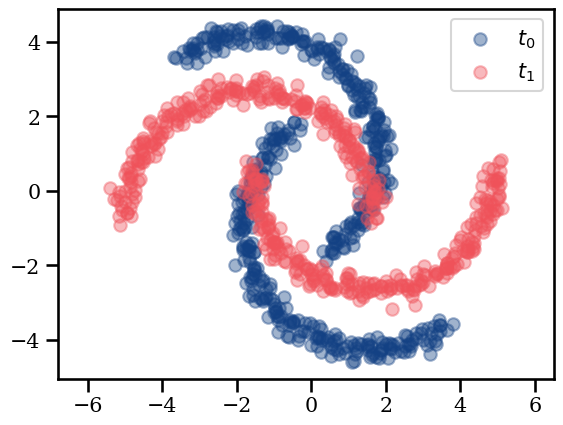

In [10]:
plot_marginals(moon.get_marginals())

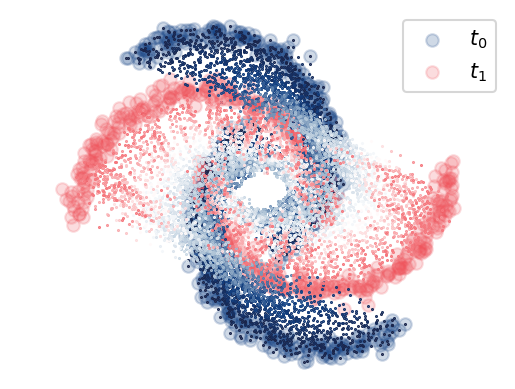

In [11]:
plt.axis("off")
plt.axis("equal")
plot_marginals(moon.get_marginals(), alpha=.2)
plot_multiple_marginals(moon.sample(samples_num=500, trials_num=7), skip_step=4)
export_fig("fig_sb_align_moon_traj")

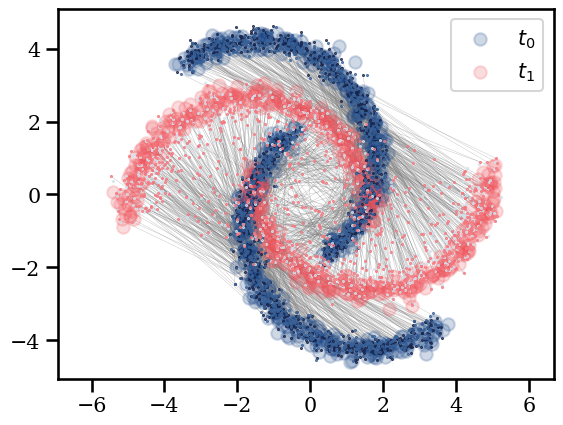

In [12]:
plot_marginals(moon.get_marginals(), alpha=.2)

moon_sampled = moon.sample(samples_num=1000, trials_num=2)
plot_matchings(*moon_sampled[[0,-1]])
plot_multiple_marginals(moon_sampled[[0,1,-2,-1]], skip_step=1, alpha=.9)

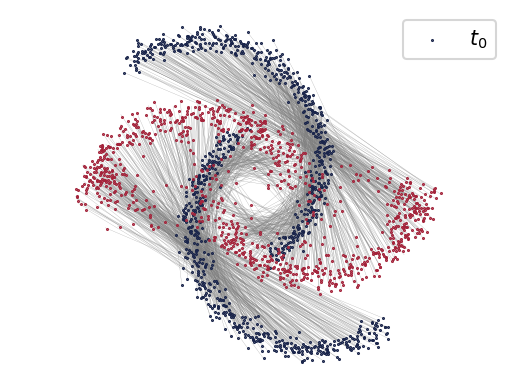

In [13]:
plt.axis("off")
plt.axis("equal")

moon_sampled = moon.sample(samples_num=1000, trials_num=7)
plot_matchings(*moon_sampled[[0,-1]])
plot_multiple_marginals(moon_sampled, skip_step=99, labels=[r"$t_0$", r"$t_1$"], alpha=1)
export_fig("fig_sb_align_moon_match")

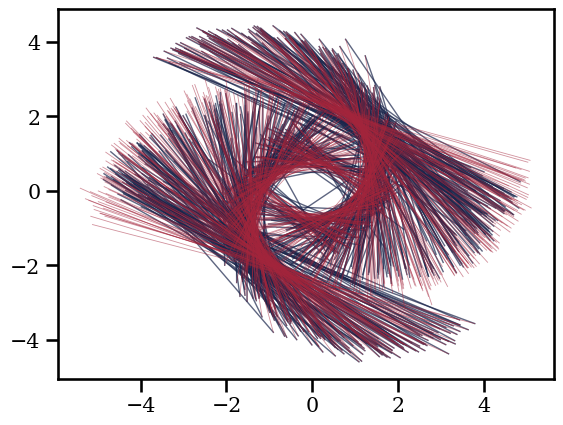

In [14]:
plot_matchings(*moon.sample(samples_num=500, trials_num=7)[[0,-1]], color=palette[0], lw=1.)
plot_matchings(*moon.get_marginals().values(), color=palette[-1], lw=.6, alpha=.5)

## T dataset

### Training

In [15]:
# AlignExperiment.run("--dataset=diagonal_matching  --h_dim=32  --n_layers=3  --n_epochs=20  --reg_weight=1.  --timestep_emb_dim=32  --diffusivity_schedule=constant  --max_diffusivity=1.  --use_drift_in_doobs=True  --activation=selu").save("t_dataset")

### Inference

In [28]:
t_dataset = AlignExperiment.load("t_dataset")

Args: {'data_dir': 'diagonal_matching', 'log_dir': 'diagonal_matching/model', 'config': None, 'wandb_id': None, 'wandb_entity': 'sb-paired', 'wandb_project': None, 'run_name': 'hcypfnvih', 'online': False, 'dataset': 'diagonal_matching', 'n_samples': 10000, 'train_bs': 32, 'val_bs': 8, 'transform': None, 'split_fracs': [0.8, 0.1, 0.1], 'num_workers': 1, 'in_dim': 2, 'out_dim': 2, 'timestep_emb_dim': 32, 'h_dim': 32, 'n_layers': 3, 'activation': 'selu', 'dropout_p': 0.1, 'n_epochs': 20, 'use_grad_noise': False, 'drift_weight': 1.0, 'reg_weight': 1.0, 'diffusivity_schedule': 'constant', 'max_diffusivity': 1.0, 'use_drift_in_doobs': True, 'optim_name': 'adam', 'lr': 0.001, 'weight_decay': 0.001, 'grad_clip_value': 1.0, 'scheduler': 'plateau', 'scheduler_mode': 'min', 'ema_decay_rate': 0.999, 'log_every': 1000, 'eval_every': 10000, 'inference_every': 0, 'inference_steps': 100, 'inference_metric': 'val_rmsd', 'inference_goal': 'min', 'early_stop_metric': 'val_loss', 'early_stop_goal': 'min'

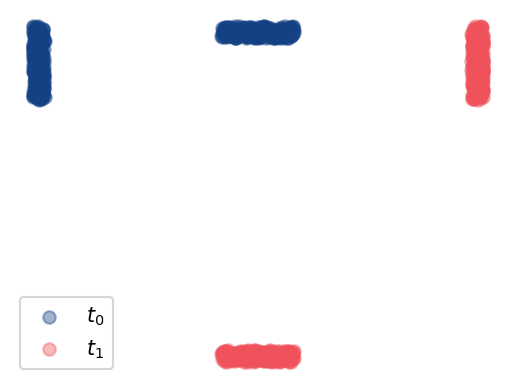

In [18]:
plt.axis('off');
plot_marginals(t_dataset.get_marginals())

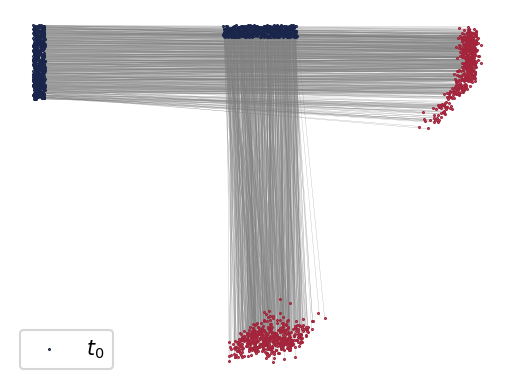

In [19]:
plt.axis("off")
plt.axis("equal")
t_sampled = t_dataset.sample(samples_num=1000, trials_num=50)
plot_multiple_marginals(t_sampled, skip_step=99, labels=[r"$t_0$", r"$t_1$"], alpha=1)
plot_matchings(*t_sampled[[0,-1]])
export_fig("fig_sb_align_t_match")

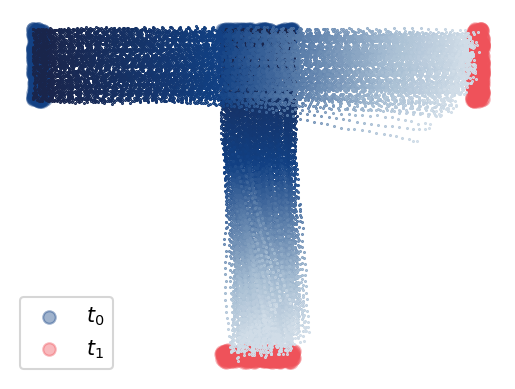

In [20]:
plt.axis("off")
plt.axis("equal")
plot_marginals(t_dataset.get_marginals())
plot_multiple_marginals(t_dataset.sample(trials_num=50), skip_step=2)
export_fig("fig_sb_align_t_traj")

## T dataset (inverse)

### Training

In [21]:
# AlignExperiment.run("--dataset=diagonal_matching_inverse  --h_dim=32  --n_layers=3  --n_epochs=20  --reg_weight=1.  --timestep_emb_dim=32  --diffusivity_schedule=constant  --max_diffusivity=1.  --use_drift_in_doobs=True  --activation=selu").save("t_dataset_inverse")

### Inference

In [22]:
t_dataset_inverse = AlignExperiment.load("t_dataset_inverse")

Args: {'data_dir': 'diagonal_matching_inverse', 'log_dir': 'diagonal_matching_inverse/model', 'config': None, 'wandb_id': None, 'wandb_entity': 'sb-paired', 'wandb_project': None, 'run_name': 'wntpmqdhj', 'online': False, 'dataset': 'diagonal_matching_inverse', 'n_samples': 10000, 'train_bs': 32, 'val_bs': 8, 'transform': None, 'split_fracs': [0.8, 0.1, 0.1], 'num_workers': 1, 'in_dim': 2, 'out_dim': 2, 'timestep_emb_dim': 32, 'h_dim': 32, 'n_layers': 3, 'activation': 'selu', 'dropout_p': 0.1, 'n_epochs': 20, 'use_grad_noise': False, 'drift_weight': 1.0, 'reg_weight': 1.0, 'diffusivity_schedule': 'constant', 'max_diffusivity': 1.0, 'use_drift_in_doobs': True, 'optim_name': 'adam', 'lr': 0.001, 'weight_decay': 0.001, 'grad_clip_value': 1.0, 'scheduler': 'plateau', 'scheduler_mode': 'min', 'ema_decay_rate': 0.999, 'log_every': 1000, 'eval_every': 10000, 'inference_every': 0, 'inference_steps': 100, 'inference_metric': 'val_rmsd', 'inference_goal': 'min', 'early_stop_metric': 'val_loss', 

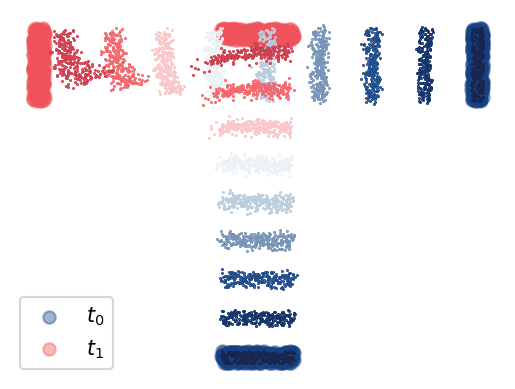

In [23]:
plt.axis('off');
plot_marginals(t_dataset_inverse.get_marginals())
plot_multiple_marginals(t_dataset_inverse.sample(trials_num=50), skip_step=12)

In [24]:
common_marginals = t_dataset.get_marginals()

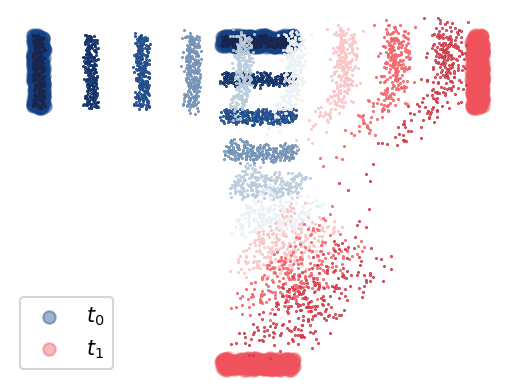

In [25]:
plt.axis('off');
plot_marginals(common_marginals)
plot_multiple_marginals(mix_trajs(t_dataset.sample(input_data=common_marginals['initial'].to(DEVICE), trials_num=50), sample_inverse(t_dataset_inverse, input_data=common_marginals['initial'].to(DEVICE), trials_num=20)), skip_step=12)